In [1]:
import numpy as np
import os
import math
import pandas as pd
from datetime import date as pdate
from sklearn import linear_model
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import statistics
from dateutil.relativedelta import relativedelta
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

6.028164079019405e-15
1Y r-score: 1.00000000, mean error = 0.000000
2Y r-score: 0.99913101, mean error = 0.000000
3Y r-score: 0.99956391, mean error = 0.000000
4Y r-score: 0.99989012, mean error = 0.000000
5Y r-score: 1.00000000, mean error = 0.000000
6Y r-score: 0.99996778, mean error = 0.000000
7Y r-score: 0.99991735, mean error = 0.000000
8Y r-score: 0.99993897, mean error = -0.000000
9Y r-score: 0.99998633, mean error = -0.000000
10Y r-score: 1.00000000, mean error = -0.000000
11Y r-score: 0.99999301, mean error = -0.000000
12Y r-score: 0.99998100, mean error = -0.000000
13Y r-score: 0.99998570, mean error = -0.000000
14Y r-score: 0.99999647, mean error = 0.000000
15Y r-score: 1.00000000, mean error = 0.000000
16Y r-score: 0.99999884, mean error = -0.000000
17Y r-score: 0.99999772, mean error = -0.000000
18Y r-score: 0.99999780, mean error = -0.000000
19Y r-score: 0.99999896, mean error = -0.000000
20Y r-score: 1.00000000, mean error = 0.000000
25Y r-score: 0.99995092, mean error =

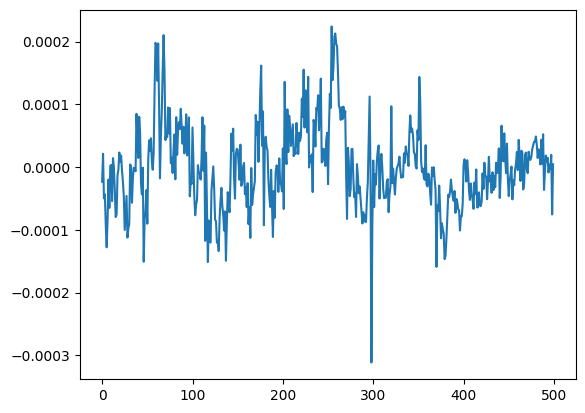

In [2]:
# Example: Linear regression model for dimension reduction

filepath = "sofr_hist_curves2.csv"

df_data = pd.read_csv(filepath, index_col = ["Tenor"])
df_data.columns = [ pd.to_datetime(c).date() for c in df_data.columns.tolist()]

# Only include data below ud
ud = pdate(2023,12,31)
training_data = df_data.loc[:, df_data.columns < ud ].T

# Choose your explanatory variables
features = ['1Y', '5Y', '10Y', '15Y', '20Y', '30Y', '40Y']
targets = training_data.columns.values.tolist()

lr = linear_model.LinearRegression()
lr.fit(training_data[features],training_data[targets])
coeffs = [[ '{:f}'.format(e)  for e in r]  for r  in lr.coef_]
#print(pd.DataFrame(coeffs))

# Predict 
pred = pd.DataFrame(lr.predict(training_data[features]), columns = targets)

# Calculate error
err = np.array(pred["7Y"]) - np.array(training_data["7Y"])

print(err.sum())
plt.plot(list(range(len(err))), err)

# R2 for your explanatory variables will be 1
for t in targets:
    err = np.array(pred[t]) - np.array(training_data[t])
    mean_err = np.mean(err)
    print(t + " r-score: " + f"{r2_score(training_data[t], pred[t]):,.8f}" + f", mean error = {mean_err:,.6f}")


# Levels of rates

In [3]:
# Example: PCA for dimension reduction

filepath = "sofr_hist_curves2.csv"
#filepath = "sofr_hist_curves3.csv"
df_data = pd.read_csv(filepath, index_col = ["Tenor"]).T

arr_data = df_data.to_numpy()
tenor_labels = list(df_data.columns)
# curve rate tenors in year fractions
tenors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 30, 35, 40]

# Standardize each column data, mean 0, variance 1
arr_data_std = StandardScaler().fit_transform(df_data)
df_data_std = pd.DataFrame(arr_data_std, columns = tenor_labels)

#pd.DataFrame(arr_data).to_csv("D:/OneDrive/main/workspace/smu-teaching/SMUTeaching/data/new_data.csv")
#pd.DataFrame(arr_data_std).to_csv("D:/OneDrive/main/workspace/smu-teaching/SMUTeaching/data/new_data_std.csv")

In [4]:
##################################
####### PCA construction #########
##################################

# Step (1): compute the correlation matrix
n = len(arr_data_std)
mat_corr = df_data.corr()

#mat_corr= np.dot(arr_data_std.transpose(), arr_data_std)/n

mat_corr

Tenor,1Y,2Y,3Y,4Y,5Y,6Y,7Y,8Y,9Y,10Y,...,15Y,16Y,17Y,18Y,19Y,20Y,25Y,30Y,35Y,40Y
Tenor,,,,,,,,,,,,,,,,,,,,,
1Y,1.000000,0.983546,0.959137,0.937353,0.919493,0.905221,0.893920,0.885189,0.878551,0.873526,...,0.860387,0.858431,0.856342,0.854058,0.851526,0.848711,0.832792,0.821808,0.813556,0.804536
2Y,0.983546,1.000000,0.991668,0.976633,0.961720,0.948128,0.936429,0.927078,0.919723,0.913806,...,0.895596,0.892711,0.889695,0.886506,0.883118,0.879508,0.860390,0.846740,0.836821,0.827425
3Y,0.959137,0.991668,1.000000,0.995832,0.987887,0.979046,0.970588,0.963398,0.957483,0.952513,...,0.935799,0.933060,0.930222,0.927254,0.924141,0.920865,0.903730,0.891042,0.881971,0.873913
4Y,0.937353,0.976633,0.995832,1.000000,0.997858,0.993289,0.987965,0.982997,0.978669,0.974862,...,0.960949,0.958582,0.956129,0.953570,0.950894,0.948087,0.933362,0.922069,0.914045,0.907177
5Y,0.919493,0.961720,0.987887,0.997858,1.000000,0.998688,0.995809,0.992621,0.989607,0.986799,...,0.975535,0.973529,0.971441,0.969256,0.966966,0.964564,0.951831,0.941757,0.934583,0.928580
6Y,0.905221,0.948128,0.979046,0.993289,0.998688,1.000000,0.999172,0.997485,0.995581,0.993637,...,0.984860,0.983210,0.981482,0.979664,0.977750,0.975734,0.964874,0.955991,0.949619,0.944336
7Y,0.893920,0.936429,0.970588,0.987965,0.995809,0.999172,1.000000,0.999536,0.998543,0.997320,...,0.990722,0.989389,0.987983,0.986491,0.984909,0.983233,0.973993,0.966160,0.960476,0.955767
8Y,0.885189,0.927078,0.963398,0.982997,0.992621,0.997485,0.999536,1.000000,0.999719,0.999067,...,0.994205,0.993124,0.991969,0.990729,0.989401,0.987981,0.979956,0.972918,0.967734,0.963427
9Y,0.878551,0.919723,0.957483,0.978669,0.989607,0.995581,0.998543,0.999719,1.000000,0.999808,...,0.996357,0.995479,0.994523,0.993480,0.992348,0.991124,0.984015,0.977587,0.972765,0.968737


In [5]:
# Get eigen vectors
# Step (2): eigen-decompose the correlation matrix using numpy function which
#           automatically orders the eigen vectors by the size of the assocaited 
#           eigenvalues
egval, egvec = np.linalg.eig(mat_corr)

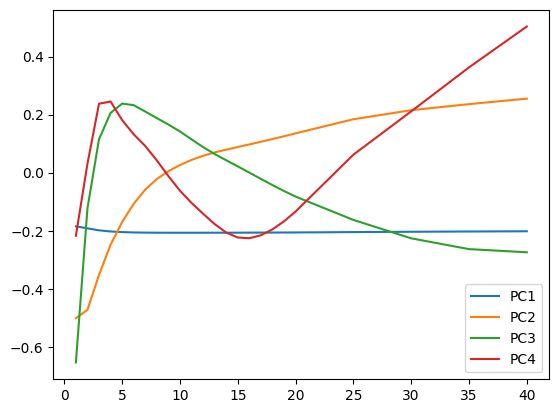

In [6]:
# Visualize the PCs (recall the PCs are effectively the eigenvectors)
dim = len(egval)
pc_labels = [ "PC"+str(i) for i in range(1, dim+1)]
df_pcs =  pd.DataFrame(egvec, columns = pc_labels)
plt.plot(tenors, df_pcs["PC1"], label = "PC1")
plt.plot(tenors, df_pcs["PC2"], label = "PC2")
plt.plot(tenors, df_pcs["PC3"], label = "PC3")
plt.plot(tenors, df_pcs["PC4"], label = "PC4")
plt.legend()
plt.show()

In [7]:
##################################
###### Data reconstruction #######
##################################


# calculate projected PC coordinates of the standardized data
pc_coordinates = np.dot(arr_data_std, egvec)
pc_coordinates

array([[ 1.42817476e+01,  1.10155310e+00, -2.29485100e-01, ...,
        -2.66548433e-06, -1.99269887e-06,  8.66305453e-06],
       [ 1.40187074e+01,  1.26900037e+00, -2.65772723e-01, ...,
        -8.44539061e-06, -6.68532534e-07,  1.36242258e-05],
       [ 1.37397414e+01,  1.21984582e+00, -2.05849471e-01, ...,
        -7.17552353e-06,  1.22131235e-06,  8.91619332e-06],
       ...,
       [-5.86765752e+00,  1.67280594e+00,  2.43465904e-01, ...,
        -1.21754256e-06, -2.36542299e-07,  1.58497882e-06],
       [-5.23743930e+00,  1.56719934e+00,  1.71735017e-01, ...,
         3.08149718e-06, -4.14033141e-07,  2.36293770e-06],
       [-4.83565472e+00,  1.55266625e+00,  1.15445500e-01, ...,
         3.21056732e-06, -1.99011795e-06,  3.11529218e-06]])

In [8]:
# cache the mean and standard deviation of the original data 
# for reverting the data standardization
mat_mean = np.tile(np.mean(arr_data, axis = 0), (n, 1))
stdev = np.std(arr_data, axis = 0)
mat_stdev = np.diag(stdev)

In [9]:
#1) full reconstruction
data_stdized_full_reconstruction = np.dot(pc_coordinates, egvec.transpose())                                        
data_full_reconstruction = np.add(mat_mean, np.dot(data_stdized_full_reconstruction, mat_stdev)) 
#check reconstruction success/failure:
#print("min difference: " + str(np.min(data_full_reconstruction - arr_data)))
#print("max difference: " + str(np.max(data_full_reconstruction - arr_data)))

In [10]:
#2) compression (utilizing the first NumPC PCs)
NumPC = 3    # Choose number of PC here
data_stdized_comp = np.dot(pc_coordinates[:,0:NumPC], egvec[:,0:NumPC].transpose())

# revert data standardization to obtained the raw curve rate data approximated
data_comp = np.add(mat_mean, np.dot(data_stdized_comp, mat_stdev))

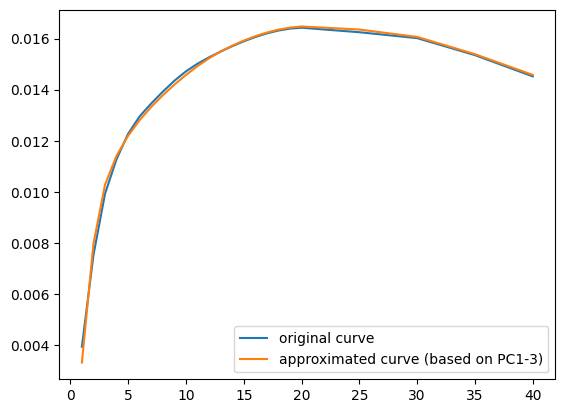

In [11]:
# compare approximated curve on the i-th date using the first 5 PCs to the original curve
i = 1   # Change date here
plt.plot(tenors, arr_data[i], label = "original curve")
plt.plot(tenors, data_comp[i], label = f"approximated curve (based on PC1-{NumPC})")
plt.legend()
plt.show()

# Daily change in rates

In [12]:
# Example: PCA for dimension reduction

#filepath = "sofr_hist_curves2.csv"
filepath = "sofr_hist_curves3.csv"
df_data = pd.read_csv(filepath, index_col = ["Tenor"]).T

arr_data = df_data.to_numpy()
tenor_labels = list(df_data.columns)
# curve rate tenors in year fractions
tenors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 30, 35, 40]

# Standardize each column data, mean 0, variance 1
arr_data_std = StandardScaler().fit_transform(df_data)
df_data_std = pd.DataFrame(arr_data_std, columns = tenor_labels)

#pd.DataFrame(arr_data).to_csv("D:/OneDrive/main/workspace/smu-teaching/SMUTeaching/data/new_data.csv")
#pd.DataFrame(arr_data_std).to_csv("D:/OneDrive/main/workspace/smu-teaching/SMUTeaching/data/new_data_std.csv")

In [13]:
##################################
####### PCA construction #########
##################################

# Step (1): compute the correlation matrix
n = len(arr_data_std)
mat_corr = df_data.corr()

#mat_corr= np.dot(arr_data_std.transpose(), arr_data_std)/n

In [14]:
# Get eigen vectors
# Step (2): eigen-decompose the correlation matrix using numpy function which
#           automatically orders the eigen vectors by the size of the assocaited 
#           eigenvalues
egval, egvec = np.linalg.eig(mat_corr)

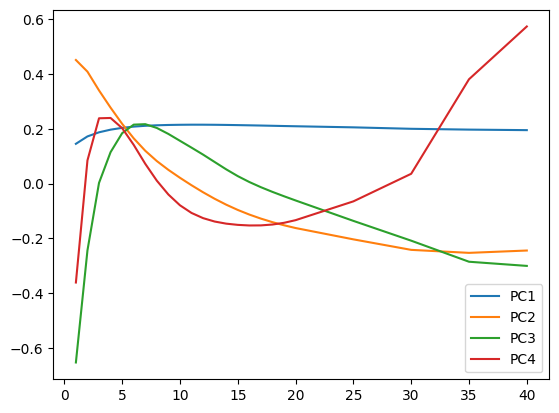

In [15]:
# Visualize the PCs (recall the PCs are effectively the eigenvectors)
dim = len(egval)
pc_labels = [ "PC"+str(i) for i in range(1, dim+1)]
df_pcs =  pd.DataFrame(egvec, columns = pc_labels)
plt.plot(tenors, df_pcs["PC1"], label = "PC1")
plt.plot(tenors, df_pcs["PC2"], label = "PC2")
plt.plot(tenors, df_pcs["PC3"], label = "PC3")
plt.plot(tenors, df_pcs["PC4"], label = "PC4")
plt.legend()
plt.show()

In [16]:
##################################
###### Data reconstruction #######
##################################


# calculate projected PC coordinates of the standardized data
pc_coordinates = np.dot(arr_data_std, egvec)
pc_coordinates

array([[ 2.46464381e+00, -1.80431608e+00, -1.82894693e-01, ...,
         5.34193124e-05,  4.20660153e-05,  1.70195400e-05],
       [ 2.59730592e+00,  7.99604325e-01,  9.81769066e-02, ...,
        -1.89702662e-05, -4.89980490e-05,  9.26936198e-06],
       [ 2.65801900e+00, -3.73402217e-02, -1.41466195e-01, ...,
         1.65910787e-05, -5.46994696e-05,  3.77365428e-05],
       ...,
       [ 8.55036859e+00, -1.03414563e+00, -5.15409396e-02, ...,
        -8.64516078e-06,  2.05441841e-06,  1.28305461e-06],
       [-6.69288549e+00,  7.42131945e-01, -2.10448476e-01, ...,
        -1.60556982e-05, -6.18533595e-06,  3.34315102e-06],
       [-4.36377080e+00, -1.71664035e-01, -2.62129999e-02, ...,
        -2.30680479e-06,  4.62743190e-06, -1.28001111e-05]])

In [17]:
# cache the mean and standard deviation of the original data 
# for reverting the data standardization
mat_mean = np.tile(np.mean(arr_data, axis = 0), (n, 1))
stdev = np.std(arr_data, axis = 0)
mat_stdev = np.diag(stdev)

In [18]:
#1) full reconstruction
data_stdized_full_reconstruction = np.dot(pc_coordinates, egvec.transpose())                                        
data_full_reconstruction = np.add(mat_mean, np.dot(data_stdized_full_reconstruction, mat_stdev)) 
#check reconstruction success/failure:
#print("min difference: " + str(np.min(data_full_reconstruction - arr_data)))
#print("max difference: " + str(np.max(data_full_reconstruction - arr_data)))

In [19]:
#2) compression (utilizing the first NumPC PCs)
NumPC = 3   # Choose number of PC here
data_stdized_comp = np.dot(pc_coordinates[:,0:NumPC], egvec[:,0:NumPC].transpose())

# revert data standardization to obtained the raw curve rate data approximated
data_comp = np.add(mat_mean, np.dot(data_stdized_comp, mat_stdev))

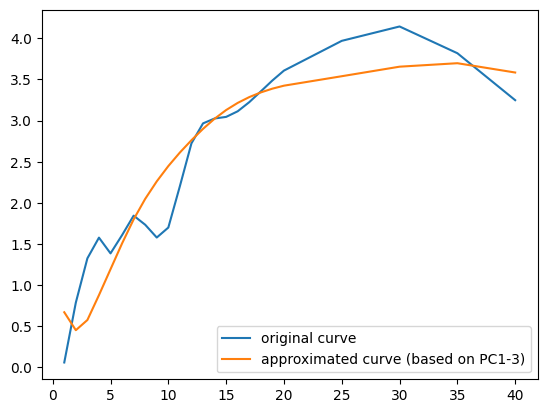

In [20]:
# compare approximated curve on the i-th date using the first 5 PCs to the original curve
i = 100    # Change date here
plt.plot(tenors, arr_data[i], label = "original curve")
plt.plot(tenors, data_comp[i], label = f"approximated curve (based on PC1-{NumPC})")
plt.legend()
plt.show()